Este colab fue desarrollado por Arnold Charry Armero.

# Promedio Móvil Simple

El Promedio Móvil Simple utiliza $n$ valores históricos anteriores, los suma y los promedia por ese mismo $n$. Matemáticamente, se expresa de la siguiente manera:

$$ \mathrm{Promedio \: Movil} = \frac{\sum \mathrm{Demanda \: de \: los \: n \:periodos \:previos}}{n} $$

Ahora se continua con la implementación en código.

In [ ]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [ ]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Se ingresa la base de datos
df = pd.read_csv("/content/drive/MyDrive/Operations I/sales-cars.csv")
df.head(10)

,Month,Sales
0,2016-01,266.0
1,2016-02,146.0
2,2016-03,183.0
3,2016-04,119.0
4,2016-05,180.0
5,2016-06,169.0
6,2016-07,232.0
7,2016-08,225.0
8,2016-09,193.0
9,2016-10,123.0


In [ ]:
#Se pasa al formato de series de tiempo
df["Month"] = pd.to_datetime(df.iloc[:, 0], format = '%Y/%m')
df.head(10)

,Month,Sales
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


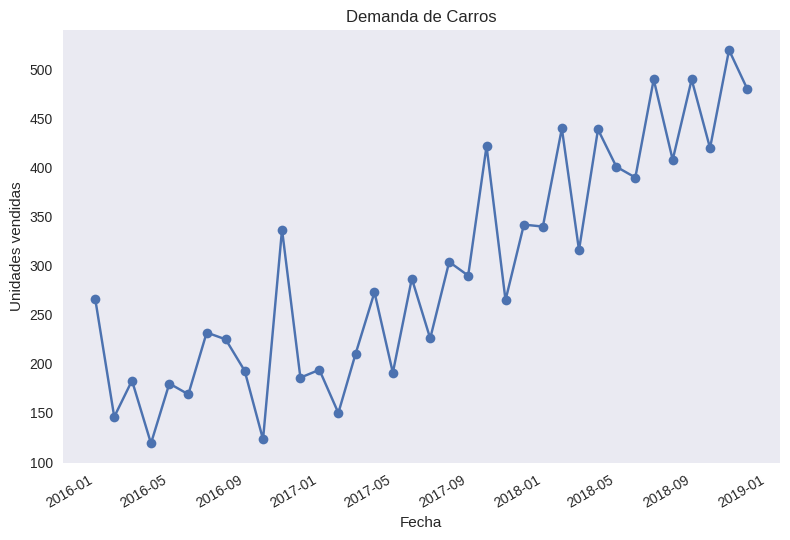

In [ ]:
#Se realiza el gráfico de los datos
plt.plot_date(df.iloc[:, 0], df.iloc[:, 1], linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")

plt.tight_layout()
plt.grid()
plt.show()

## Pronósticos con Promedio Móvil Simple

### Promedio Móvil Simple

Utilizando el conocimiento adquirido en Pensamiento Algorítmico, es posible crear una función con bucles y condicionales para pronosticar usando el método del Promedio Móvil Simple a una columna de datos.

In [ ]:
#Se realiza el código del promedio móvil simple manualmente

def Promedio_Movil_Simple(n, number_column):
  """
  Calcula el Promedio Móvil Simple tomando en cuenta los n valores anteriores

  Args:
    n: Entero que indica los n valores anteriores tomados en cuenta
    para el pronóstico del término siguiente.
    number_column: Número de la columna seleccionada del dataframe.
  Returns:
    Moving_average: lista con los respectivos pronósticos.
  """

  Moving_average = []
  l = len(df.iloc[:, number_column])

  for i in range(l):
    sum = 0
    average = 0
    if i < n:
      Moving_average.append(np.nan)
    else:
      for j in range(n):
        sum += df.iloc[i - n + j, number_column]
      average = sum / n
      Moving_average.append(average)

  return Moving_average

In [ ]:
#Agregamos los prónosticos al dataframe
df.insert(loc = 2, column = "Promedio Móvil Simple (OPI Función)", value = Promedio_Movil_Simple(3, 1))
df

,Month,Sales,Promedio Móvil Simple (OPI Función)
0,2016-01-01,266.0,NaN
1,2016-02-01,146.0,NaN
2,2016-03-01,183.0,NaN
3,2016-04-01,119.0,198.333333
4,2016-05-01,180.0,149.333333
5,2016-06-01,169.0,160.666667
6,2016-07-01,232.0,156.000000
7,2016-08-01,225.0,193.666667
8,2016-09-01,193.0,208.666667
9,2016-10-01,123.0,216.666667


### Promedio Móvil Simple con Funciones de Pandas

In [ ]:
#Se realiza el promedio móvil simple por medio de una función
n = 3
df["Promedio Móvil Simple (Función de Pandas)"] = df["Sales"].shift(periods=1).rolling(window = n).mean() #el parámetro junto a window es n
df

,Month,Sales,Promedio Móvil Simple (OPI Función),Promedio Móvil Simple (Función de Pandas)
0,2016-01-01,266.0,NaN,NaN
1,2016-02-01,146.0,NaN,NaN
2,2016-03-01,183.0,NaN,NaN
3,2016-04-01,119.0,198.333333,198.333333
4,2016-05-01,180.0,149.333333,149.333333
5,2016-06-01,169.0,160.666667,160.666667
6,2016-07-01,232.0,156.000000,156.000000
7,2016-08-01,225.0,193.666667,193.666667
8,2016-09-01,193.0,208.666667,208.666667
9,2016-10-01,123.0,216.666667,216.666667


### Errores de Pronóstico

Para tener los errores, se comparan los valores reales de demanda con los valores pronosticados. De tal forma que se modela matemáticamente como,

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix} $$

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
D_{t} - F_{t}
\end{vmatrix} $$

In [ ]:
# Se calculan los errores

def Errores(n, number_column, forecast_column):
  """
  Calcula los errores tomando en cuenta los n valores anteriores

  Args:
    n: Entero que indica los n valores anteriores tomados en cuenta
    para el pronóstico del término siguiente.
    number_column: Número de la columna seleccionada del dataframe.
    forecast_column: Número de la columna en la que se hizo el pronóstico.
  Returns:
    Errors: lista con los errores de los respectivos pronósticos.
  """

  Errors = []
  l = len(df.iloc[:, number_column])

  for i in range(l):
    if i < n:
      Errors.append(np.nan)
    else:
      Error = np.abs(df.iloc[i, number_column] - df.iloc[i, forecast_column])
      Errors.append(Error)

  return Errors

In [ ]:
df.insert(loc = 4, column = "Errores (OPI Función)", value = Errores(3, 1, 2))
df

,Month,Sales,Promedio Móvil Simple (OPI Función),Promedio Móvil Simple (Función de Pandas),Errores (OPI Función)
0,2016-01-01,266.0,NaN,NaN,NaN
1,2016-02-01,146.0,NaN,NaN,NaN
2,2016-03-01,183.0,NaN,NaN,NaN
3,2016-04-01,119.0,198.333333,198.333333,79.333333
4,2016-05-01,180.0,149.333333,149.333333,30.666667
5,2016-06-01,169.0,160.666667,160.666667,8.333333
6,2016-07-01,232.0,156.000000,156.000000,76.000000
7,2016-08-01,225.0,193.666667,193.666667,31.333333
8,2016-09-01,193.0,208.666667,208.666667,15.666667
9,2016-10-01,123.0,216.666667,216.666667,93.666667


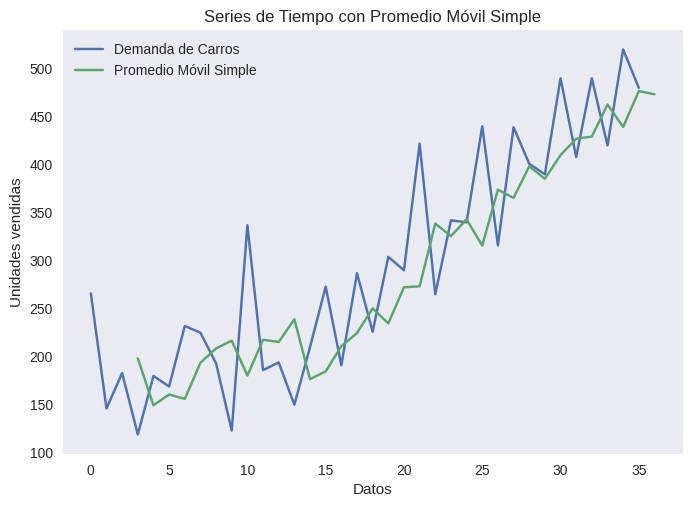

In [ ]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 1], label = 'Demanda de Carros')
plt.plot(df.iloc[:, 2], label = 'Promedio Móvil Simple')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con Promedio Móvil Simple')
plt.xlabel("Datos")
plt.ylabel("Unidades vendidas")
plt.show()

### MAD

Una medida muy importante utilizada para medir el error global de un tipo de pronóstico es el MAD, el cual es el promedio de los errores. Matemáticamente se define así:

$$ \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

In [ ]:
#Para calcular el MAD
def MAD_Promedio_Movil_Simple(n):
  """
  Calcula el MAD del Promedio Móvil Simple tomando en cuenta
  los n valores anteriores

  Args:
    n: Entero que indica los n valores anteriores tomados en cuenta
    para el pronóstico del término siguiente.

  Returns:
    MAD: Número float con la desviación absoluta media (MAD).
  """

  Moving_average = []
  l = len(df.iloc[:, 1])

  for i in range(l):
    sum = 0
    average = 0
    if i < n:
      Moving_average.append(np.nan)
    else:
      for j in range(n):
        sum += df.iloc[i - n + j, 1]
      average = sum / n
      Moving_average.append(average)

  Errors = []
  l = len(df.iloc[:, 1])

  for i in range(l):
    if i < n:
      Errors.append(np.nan)
    else:
      Error = np.abs(df.iloc[i, 1] - Moving_average[i])
      Errors.append(Error)

  sum = 0
  total = l - n - 1

  for i in range(n, l - 1):
    sum += Errors[i]

  mad = sum / total

  return mad

In [ ]:
#Calculamos el MAD
MAD_Promedio_Movil_Simple(3)

52.73737373737376

In [ ]:
#Otra forma de calcular MAD
mad = np.mean(np.abs(df["Sales"][n:-1]-df["Promedio Móvil Simple (OPI Función)"][n:-1]))
mad

52.737373737373744

### Optimización del $n$

Ahora bien, haciéndo uso de los conocimientos de Analítica I y Matemáticas Aplicadas I, se puede minimizar la función objetivo MAD para obtener el mínimo error.

$ \mathbf{f.o.} $
$$ \mathit{min} \: \: \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

$ \mathbf{s.a.} $
$$ n <  N $$
donde,

$ N = \mathrm{Total \: de \: datos} $

In [ ]:
#Ahora se va a buscar el n óptimo que minimiza el MAD
x = np.arange(2, len(df.iloc[:, 1]) - 2, 1)
y = [MAD_Promedio_Movil_Simple(n) for n in x]

min = None

for i in range(len(y)):
  if min is None or min > y[i]:
    min = y[i]
    minx = x[i]

print("El mínimo MAD es de {} con un n de {}.".format(min, minx))

El mínimo MAD es de 48.2109375 con un n de 4.


### Referencias
*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.